# 演示xadc 两通道顺序采样
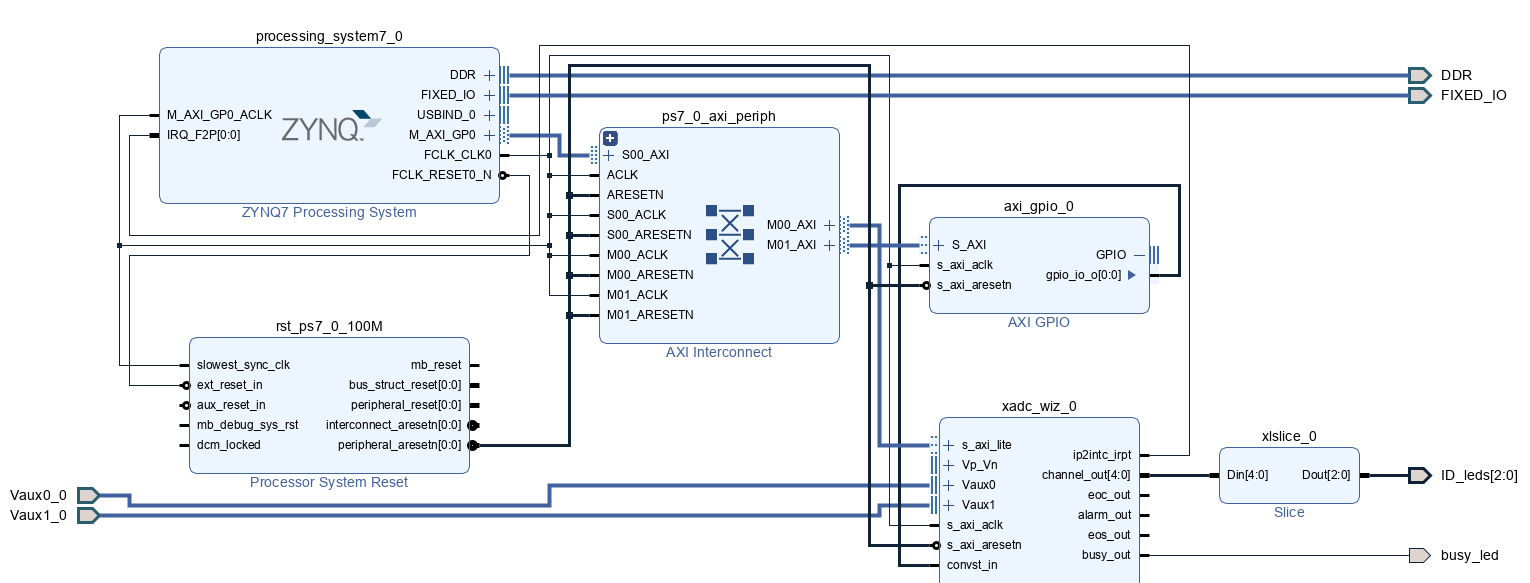

In [1]:
from pynq import Overlay

In [2]:
ol = Overlay('./overlay/xadc_2ch.bit')

In [3]:
from pynq.lib import AxiGPIO
from time import sleep
sleep(0.2)

In [4]:
gpio_ip = ol.ip_dict['axi_gpio_0']
controller = AxiGPIO(gpio_ip).channel1

In [5]:
from pynq import MMIO

/*
 * System Monitor/ADC External Channel Registers
 */
#define XSM_AUX00_OFFSET	(XSM_IP_OFFSET + 0x240)
					/**< ADC out of VAUXP0/VAUXN0 */
#define XSM_AUX01_OFFSET	(XSM_IP_OFFSET + 0x244)
					/**< ADC out of VAUXP1/VAUXN1 */
#define XSM_AUX02_OFFSET	(XSM_IP_OFFSET + 0x248)

cited from xsysmon_hw.h

其中XSM_IP_OFFSET = 0x0

In [6]:
for i in range(32):
    controller.write(1,0x1)
    sleep(0.2)
    controller.write(0,0x1)
    sleep(0.2)

In [7]:
xadc_aux0 = MMIO(ol.ip_dict['xadc_wiz_0']['phys_addr'] + 0x240,  0xf)

In [8]:
xadc_aux1 = MMIO(ol.ip_dict['xadc_wiz_0']['phys_addr'] + 0x240 + 0x4,  0xf)

In [9]:
aux0_raw = xadc_aux0.read(0x0)
aux0_voltage = aux0_raw*3.0/65535
aux0_voltage

0.0

In [10]:
aux1_raw = xadc_aux1.read(0x0)
aux1_voltage = aux1_raw*3.0/65535
aux1_voltage

0.0